### Project Goal: The goal of the project is to the understand the impact of different variables on the promotion of an employee in an organization and build a predictive model for the same

#### Importing the libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
rcParams['figure.figsize'] = 20,8
os.chdir("C://Users//Arnab//Desktop//Competitions//HR Analytics")

#### Importing the datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### Looking at the shape of the datasets

In [3]:
print("The shape of the training set is : {}".format(train.shape))
print("The shape of the test set is : {}".format(test.shape))

The shape of the training set is : (54808, 14)
The shape of the test set is : (23490, 13)


### Data Preprocessing

#### Looking for null values in the training and test set

In [4]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

#### looking at the data types of the variables

In [6]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

#### Treating the null values

In [7]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#### Education of an employee can be approximated from the age 

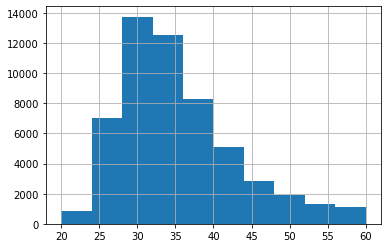

In [8]:
train['age'].hist()

#### Categorizing the age variable

In [9]:
bins = [0, 28, 36, 45, 61]
labels = ['0 to 27','28 to 35','36 to 44','45 to 60']
train['Age Group'] = pd.cut(train['age'], bins = bins, labels = labels)

In [10]:
train['Age Group'].value_counts()

28 to 35    25652
36 to 44    12483
0 to 27     11048
45 to 60     5625
Name: Age Group, dtype: int64

In [11]:
train.groupby(['Age Group','education'])['education'].count()

Age Group  education       
0 to 27    Bachelor's           9033
           Below Secondary       800
           Master's & above      111
28 to 35   Bachelor's          18508
           Below Secondary         5
           Master's & above     6280
36 to 44   Bachelor's           6395
           Master's & above     5783
45 to 60   Bachelor's           2733
           Master's & above     2751
Name: education, dtype: int64

#### Creating another age variable which is the age at which the employee joined the company

In [12]:
train['joining age'] = train['age'] - train['length_of_service']

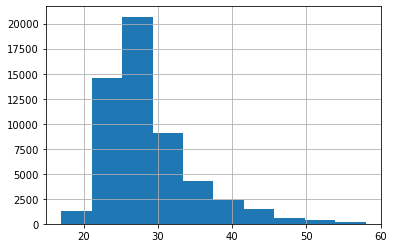

In [13]:
train['joining age'].hist()

#### Age of joining categories

In [14]:
bins = [0, 22, 27, 30, 40, 60]
labels = ['0 to 21','22 to 26','27 to 29','30 to 39','40 to 59']
train['Age Join Group'] = pd.cut(train['joining age'], bins = bins, labels = labels)

In [15]:
train['Age Join Group'].value_counts()

22 to 26    24363
30 to 39    12292
27 to 29    11861
0 to 21      3176
40 to 59     3116
Name: Age Join Group, dtype: int64

In [16]:
train.groupby(['Age Group','Age Join Group','education'])['education'].count()

Age Group  Age Join Group  education       
0 to 27    0 to 21         Bachelor's           1628
                           Below Secondary       478
                           Master's & above       20
           22 to 26        Bachelor's           7405
                           Below Secondary       322
                           Master's & above       91
28 to 35   0 to 21         Bachelor's            496
                           Master's & above       61
           22 to 26        Bachelor's          11038
                           Below Secondary         2
                           Master's & above     3011
           27 to 29        Bachelor's           5415
                           Below Secondary         3
                           Master's & above     2095
           30 to 39        Bachelor's           1559
                           Master's & above     1113
36 to 44   0 to 21         Bachelor's              4
                           Master's & above        4
  

In [17]:
edu = (train['Age Group'] == "0 to 27")
train.loc[train['education'].isnull() & edu, 'education'] = "Bachelor's"

edu = ((train['Age Group'] == "28 to 35") & (train['Age Join Group'] == "0 to 21"))
train.loc[train['education'].isnull() & edu, 'education'] = "Bachelor's"

edu = ((train['Age Group'] == "28 to 35") & (train['Age Join Group'] == "22 to 26"))
train.loc[train['education'].isnull() & edu, 'education'] = "Bachelor's"

edu = ((train['Age Group'] == "28 to 35") & (train['Age Join Group'] == "27 to 29"))
train.loc[train['education'].isnull() & edu, 'education'] = "Bachelor's"

edu = ((train['Age Group'] == "28 to 35") & (train['Age Join Group'] == "30 to 39"))
train.loc[train['education'].isnull() & edu, 'education'] = "Master's & above"

edu = ((train['Age Group'] == "36 to 44") & (train['Age Join Group'] == "0 to 21"))
train.loc[train['education'].isnull() & edu, 'education'] = "Bachelor's"

edu = ((train['Age Group'] == "36 to 44") & (train['Age Join Group'] == "22 to 26"))
train.loc[train['education'].isnull() & edu, 'education'] = "Bachelor's"

edu = ((train['Age Group'] == "36 to 44") & (train['Age Join Group'] == "27 to 29"))
train.loc[train['education'].isnull() & edu, 'education'] = "Bachelor's"

edu = ((train['Age Group'] == "36 to 44") & (train['Age Join Group'] == "30 to 39"))
train.loc[train['education'].isnull() & edu, 'education'] = "Master's & above"

edu = ((train['Age Group'] == "36 to 44") & (train['Age Join Group'] == "40 to 59"))
train.loc[train['education'].isnull() & edu, 'education'] = "Master's & above"

edu = (train['Age Group'] == "45 to 60")
train.loc[train['education'].isnull() & edu, 'education'] = "Master's & above"

#### Here the null values have been imputed based on the different age groups and joining age groups

In [18]:
train['education'].isnull().sum()

0

#### Treating the null values for previous year rating

#### Here the prevoius year rating will be approximated based on whether KPIs were met and promoted or not

In [19]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [20]:
train.groupby(['KPIs_met >80%','is_promoted','previous_year_rating'])['previous_year_rating'].count()

KPIs_met >80%  is_promoted  previous_year_rating
0              0            1.0                      5393
                            2.0                      3393
                            3.0                     13359
                            4.0                      5753
                            5.0                      3632
               1            1.0                        31
                            2.0                        63
                            3.0                       451
                            4.0                       146
                            5.0                       614
1              0            1.0                       742
                            2.0                       651
                            3.0                      3904
                            4.0                      3340
                            5.0                      6188
               1            1.0                        57
                       

In [21]:
rating = ((train['is_promoted'] == 1) & (train['KPIs_met >80%'] == 1))
train.loc[train['previous_year_rating'].isnull()  & rating, 'previous_year_rating'] = 5

rating = ((train['is_promoted'] == 1) & (train['KPIs_met >80%'] == 0))
train.loc[train['previous_year_rating'].isnull() & rating, 'previous_year_rating'] = 5

rating = ((train['is_promoted'] == 0) & (train['KPIs_met >80%'] == 0))
train.loc[train['previous_year_rating'].isnull() & rating, 'previous_year_rating'] = 3

rating = ((train['is_promoted'] == 0) & (train['KPIs_met >80%'] == 1))
train.loc[train['previous_year_rating'].isnull() & rating, 'previous_year_rating'] = 5

In [22]:
train['previous_year_rating'].isnull().sum()

0

In [23]:
train['previous_year_rating'].value_counts()

3.0    21199
5.0    13284
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [24]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Age Group,joining age,Age Join Group
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,28 to 35,27,22 to 26
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,28 to 35,26,22 to 26
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,28 to 35,27,22 to 26
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,36 to 44,29,27 to 29
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,36 to 44,43,40 to 59


#### Converting the values in the gender column to Male and Female

In [25]:
train['gender'] = train['gender'].replace({'f': 'Female', 'm': 'Male'})

In [26]:
train['gender'].value_counts()

Male      38496
Female    16312
Name: gender, dtype: int64

In [27]:
train.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
Age Group               category
joining age                int64
Age Join Group          category
dtype: object

#### Converting previous year ratings, KPIs met > 80%, awards won and is promoted to object

In [28]:
train['previous_year_rating'] = train['previous_year_rating'].astype('str')
train['KPIs_met >80%'] = train['KPIs_met >80%'].astype('str')
train['awards_won?'] = train['awards_won?'].astype('str')
train['is_promoted'] = train['is_promoted'].astype('str')

In [29]:
train.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating      object
length_of_service          int64
KPIs_met >80%             object
awards_won?               object
avg_training_score         int64
is_promoted               object
Age Group               category
joining age                int64
Age Join Group          category
dtype: object

#### Getting the counts of the categorical features

In [30]:
columns = ['department','region','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%',
          'awards_won?','is_promoted']

In [31]:
for feature in columns:
    print("The value counts for {} is:\n \n{}\n ".format(feature, train[feature].value_counts()))

The value counts for department is:
 
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
 
The value counts for region is:
 
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: 

### Exploratory Data Analysis

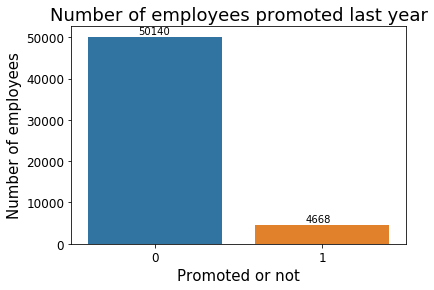

In [32]:
plot = sb.countplot(train['is_promoted'])
plt.xlabel("Promoted or not", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees promoted last year", fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))

#### 4668 out of 54,808 which is 8.51% of the employees have been promoted the previous year

#### How many male and how many female employees were promoted

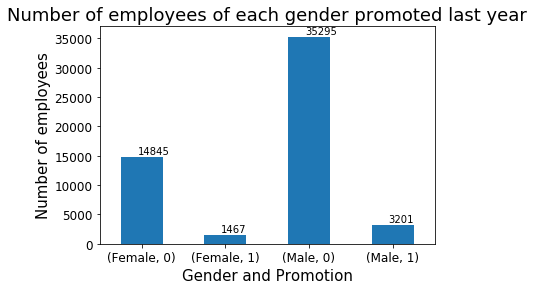

In [33]:
plot = train.groupby('gender')['is_promoted'].value_counts().plot.bar()
plt.xlabel("Gender and Promotion", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees of each gender promoted last year", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 360)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+500))

#### 3201 out of 38496 which is 8.31% of the male employees were promoted
#### 1467 out of 16312 which is 9% of the female employees were promoted
#### Out of the total people promoted males contributed 68.57% and females contributed 31.43%

#### Does education help in getting promoted

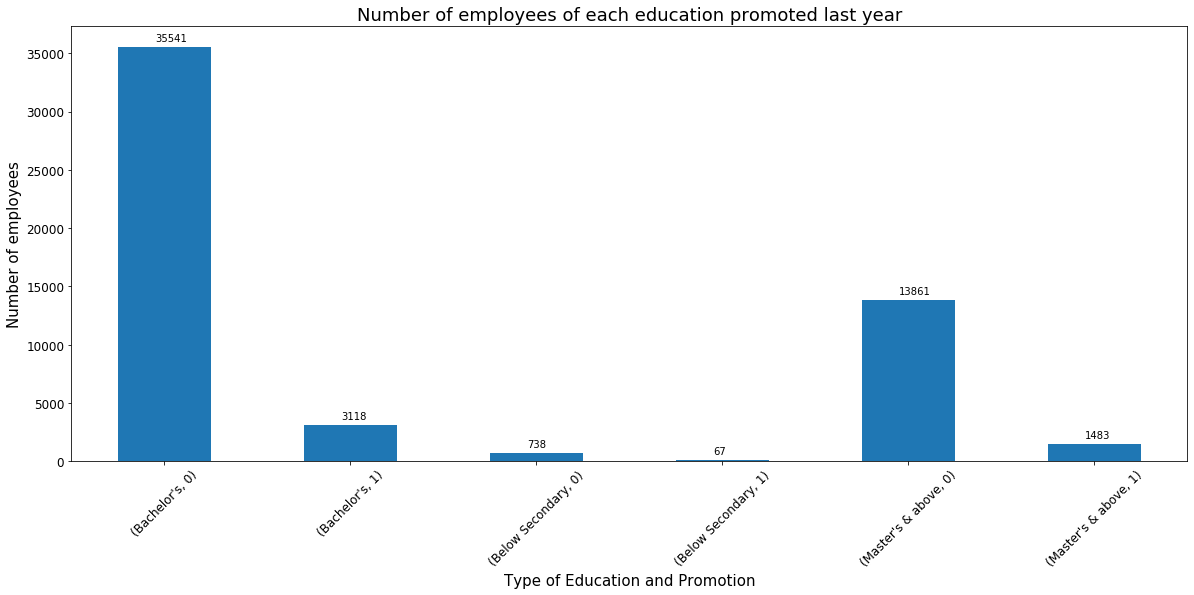

In [34]:
plt.figure(figsize = (20,8))
plot = train.groupby(['education'])['is_promoted'].value_counts().plot.bar()
plt.xlabel("Type of Education and Promotion", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees of each education promoted last year", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+500))

#### 3118 out of 38659 which is 8.06% of the Bachelors were promoted
#### 67 out of 805 which is 8.32% of the employees below secondary degrees were promoted
#### 1483 out of 15344 which is 9.66% of the employees having masters degrees were promoted
#### Out of the total number promoted Bachelors, Below Secondary and Masters contributed 66.79%, 1.43% and 31.76% respectively

#### Does previous year rating affect the promotion of an employee?

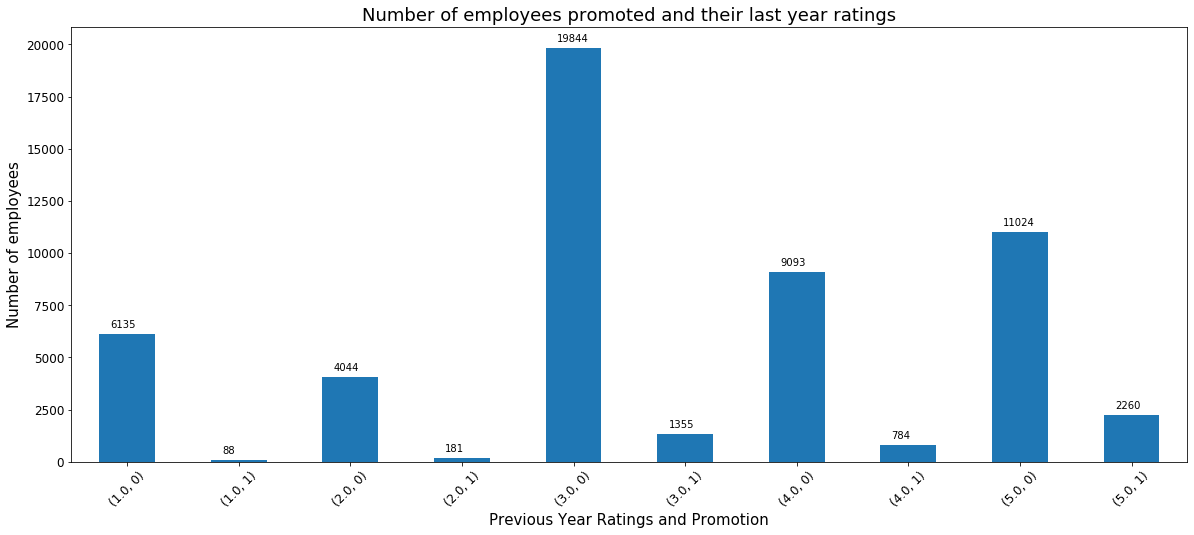

In [35]:
plt.figure(figsize = (20,8))
plot = train.groupby(['previous_year_rating'])['is_promoted'].value_counts().plot.bar()
plt.xlabel("Previous Year Ratings and Promotion", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees promoted and their last year ratings", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+300))

#### Out of the total number of people promoted:
#### 5 Point Rating employees were 48.41%
#### 4 Point Rating employees were 16.79%
#### 3 Point Rating employees were 29.03%
#### 2 Point Rating employees were 3.87%
#### 1 Point Rating employees were 1.88%

#### Here we can see that 4 point rating employees has a lesser percentage of promotion compared to 3 point rating employees. This is because of the fact that the number of people with 3 point ratings is much higher than the number of people with 4 point rating.

#### Are long term employees getting more promotion compared to short term employees?

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

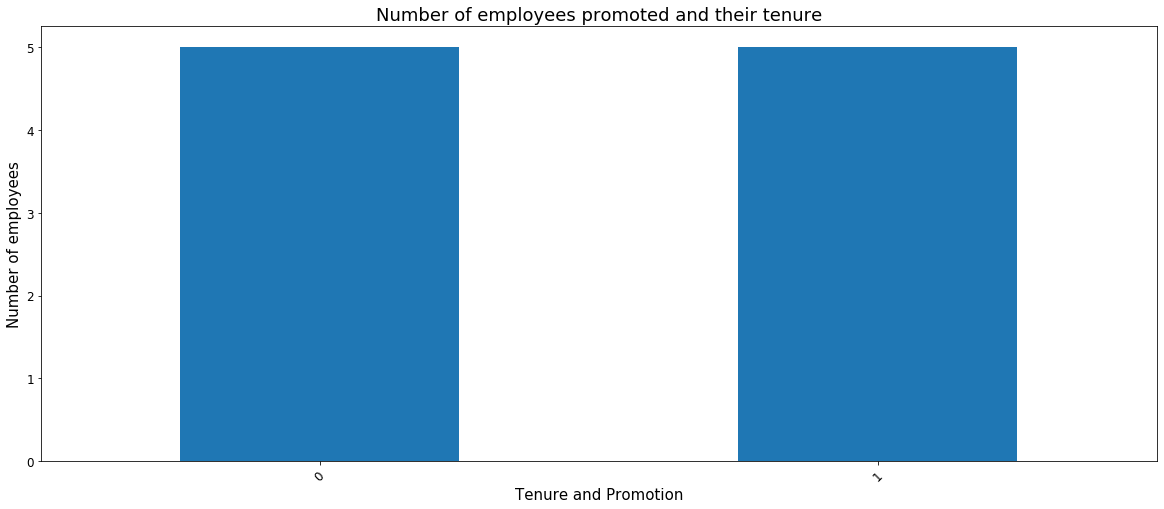

In [36]:
plt.figure(figsize = (20,8))
plot = train.groupby(['is_promoted'])['length_of_service'].median().plot.bar()
plt.xlabel("Tenure and Promotion", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees promoted and their tenure", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)

#### There is no difference between the median tenure of employees of promoted and non promoted employees

#### How many employees are getting promoted from each department

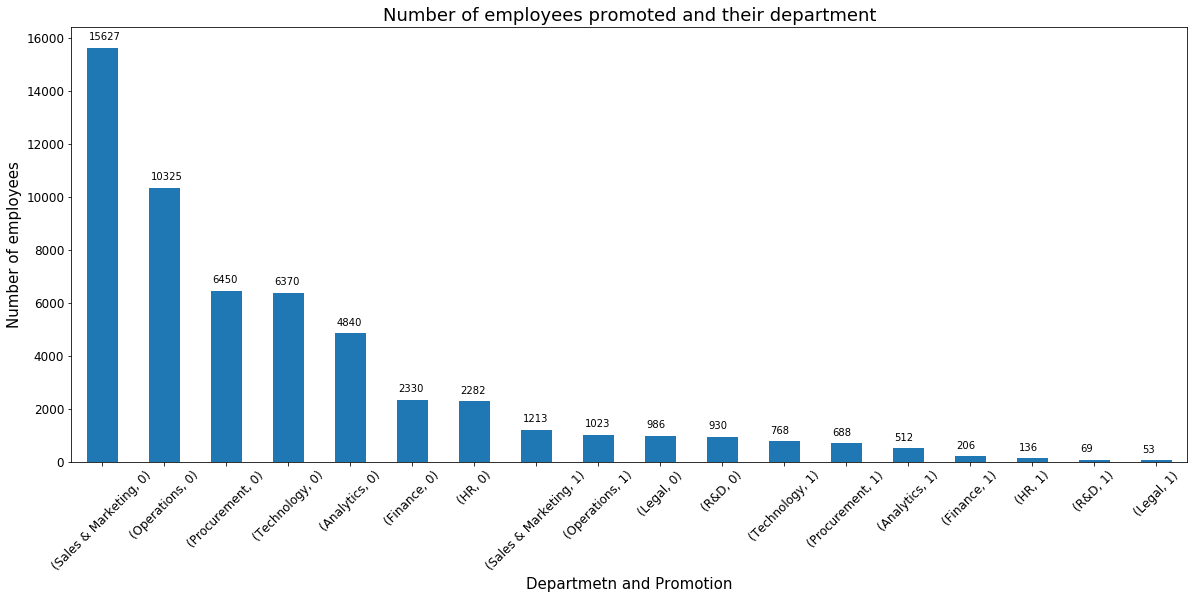

In [37]:
plt.figure(figsize = (20,8))
plot = train.groupby(['department'])['is_promoted'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel("Departmetn and Promotion", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees promoted and their department", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+300))

#### The contributions of the different departments towards promoted employees are:

#### Sales and Marketing: 25.98%
#### Operations: 21.91%
#### Legal: 21.12%
#### R&D: 19.92%
#### Finance: 16.45%
#### Analytics: 10.96%
#### Procurement: 14.7% 
#### HR: 2.9%

#### Are referrals getting promotion or outside hires?

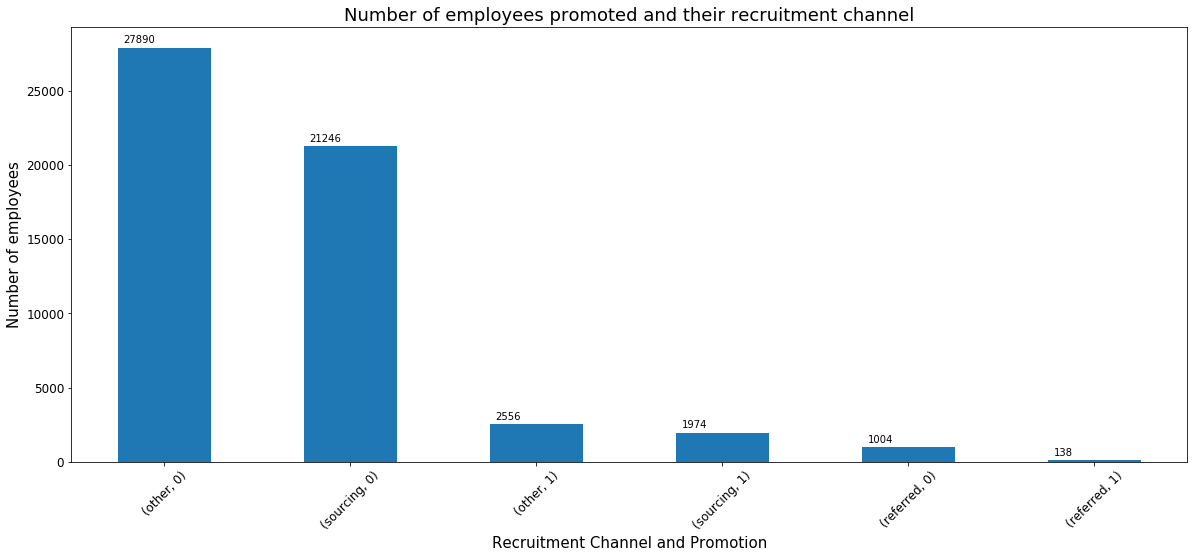

In [38]:
plt.figure(figsize = (20,8))
plot = train.groupby(['recruitment_channel'])['is_promoted'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel("Recruitment Channel and Promotion", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees promoted and their recruitment channel", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+300))

#### The contributions of the different departments towards promoted employees are:

#### Sourcing: 42.28%. In sourcing 8.5% were promoted.
#### Other: 54.75% In others 8.3% were promoted
#### Referral: 2.95% In referral 12.08% were promoted

#### Looking at the relationship between the number of trainings, training score and promotion

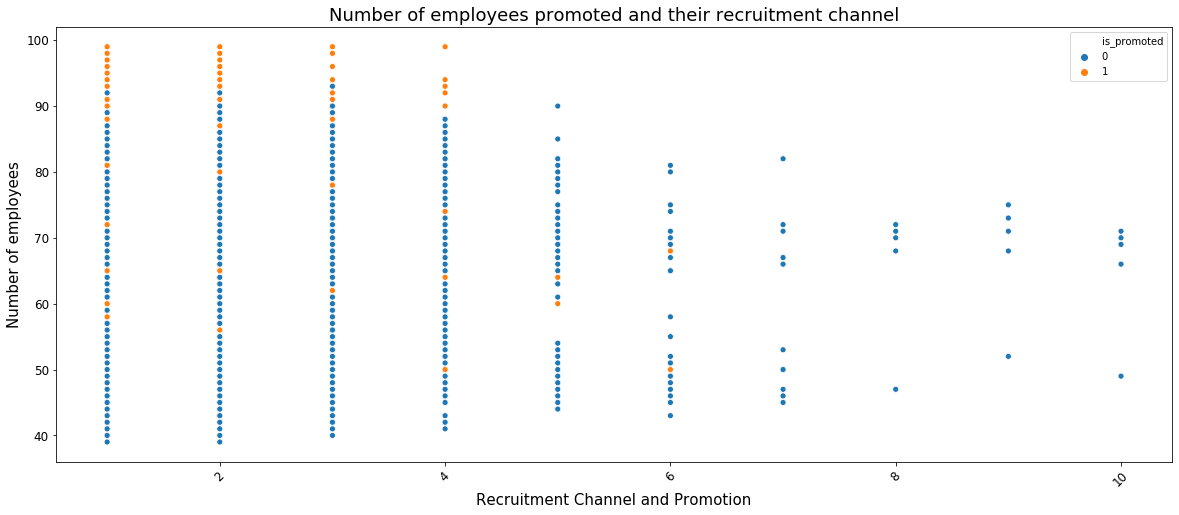

In [39]:
plt.figure(figsize = (20,8))
plot = sb.scatterplot(x = 'no_of_trainings', y ='avg_training_score', hue= 'is_promoted', data = train)
plt.xlabel("Recruitment Channel and Promotion", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees promoted and their recruitment channel", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+300))

#### Here we can see that majority of the employees who got promoted had high training scores but there were very few employees who got promoted and took more than 4 trainings.

#### How many people got promoted from each region

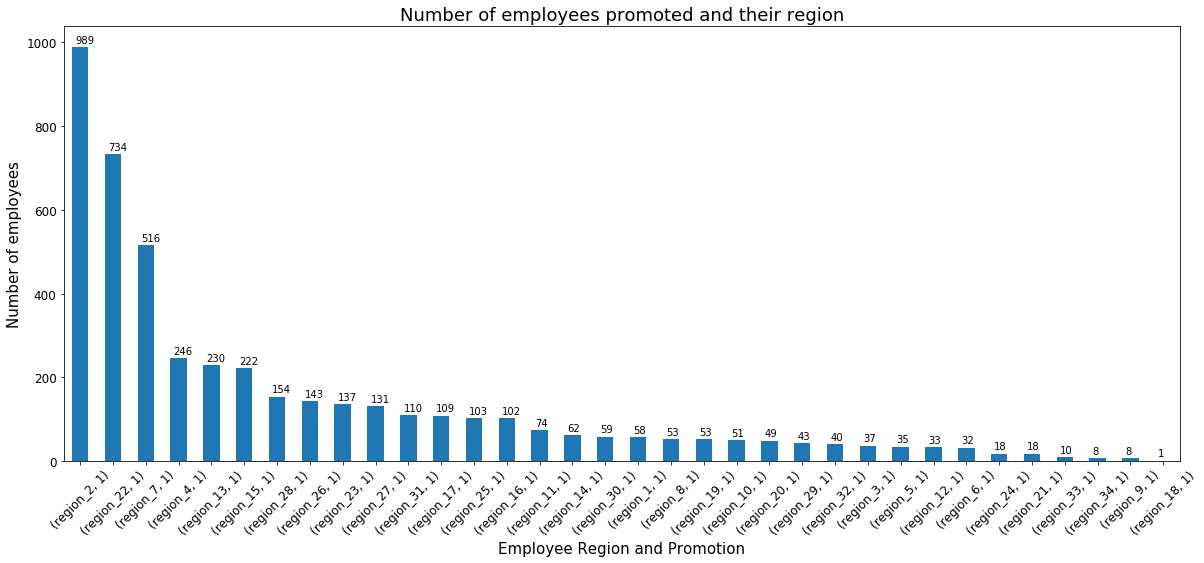

In [40]:
plt.figure(figsize = (20,8))
promoted = train[train['is_promoted'] == "1"]
plot = promoted.groupby(['region'])['is_promoted'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel("Employee Region and Promotion", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees promoted and their region", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

#### 4 out of 34 regions contribute to 53% of the employees being promoted

#### How are ratings impacting promotion in different departments?

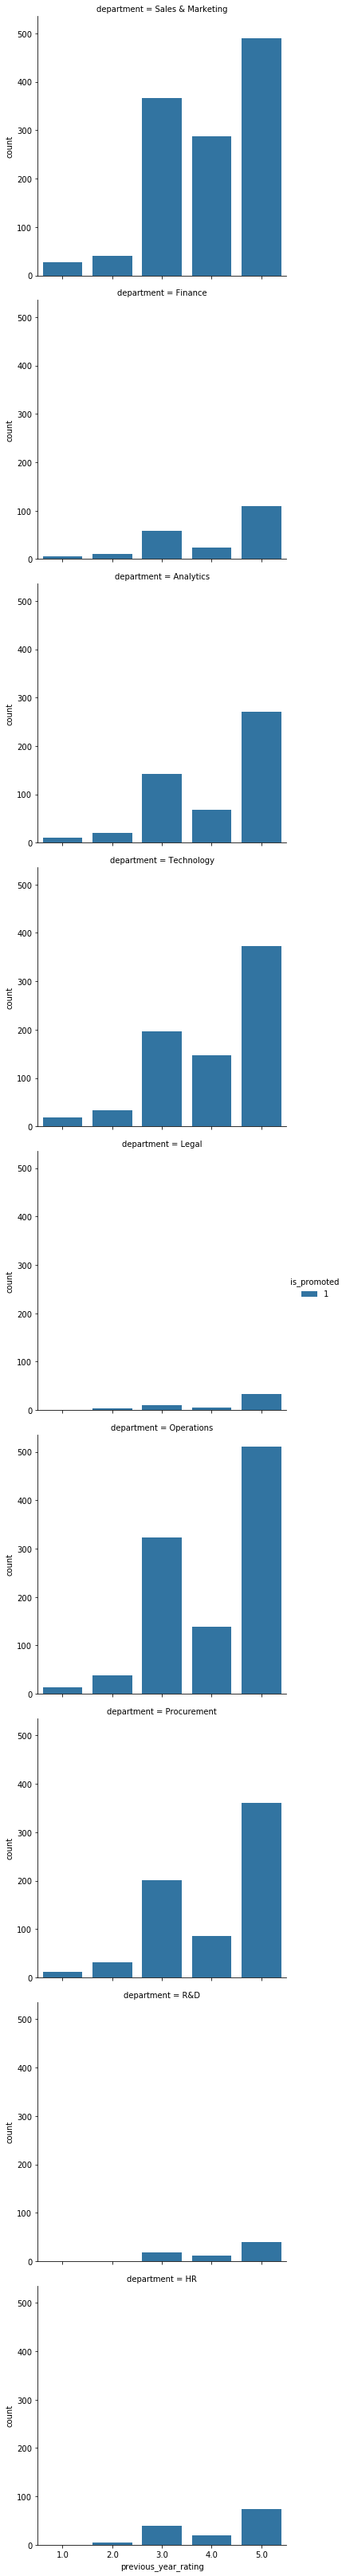

In [41]:
plot = sb.catplot(x = "previous_year_rating", hue = "is_promoted", row = "department", data = promoted, kind = "count")

#### Here we can see very few employees are promoted from the HR, Operations and Analytics Department

#### What is the gender diversity  in the different departments?

#### There is high imbalance of gender in the sales & marketing domain where females represent 18.72% 

In [42]:
gender_diversity = pd.DataFrame(train.groupby(['department','gender'])['gender'].count())
gender_diversity['percent'] = gender_diversity['gender']/(gender_diversity.groupby('department')['gender'].sum()) * 100

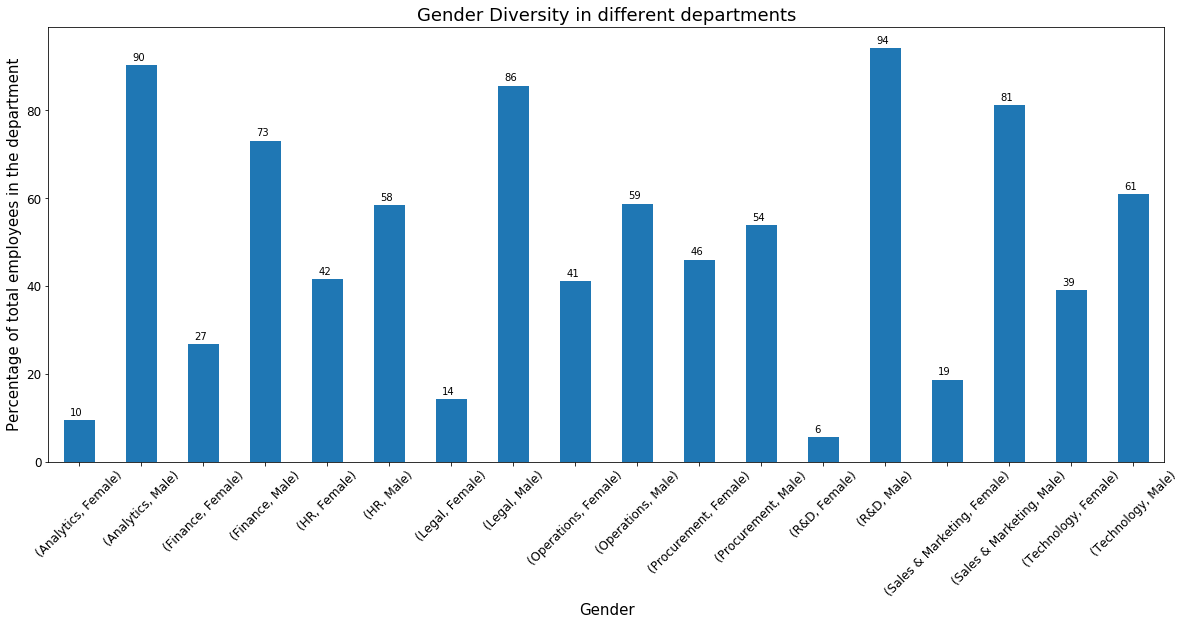

In [43]:
plt.figure(figsize = (20,8))
plot = gender_diversity['percent'].plot.bar()
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Percentage of total employees in the department", fontsize = 15)
plt.title("Gender Diversity in different departments", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+ 1))

#### We can see some balance in gender diversity in departments like Operations and Procurment while high imbalance in R&D (where 96% are male), Analytics (90% are male)

#### Does the gender affect promotion in the departments?

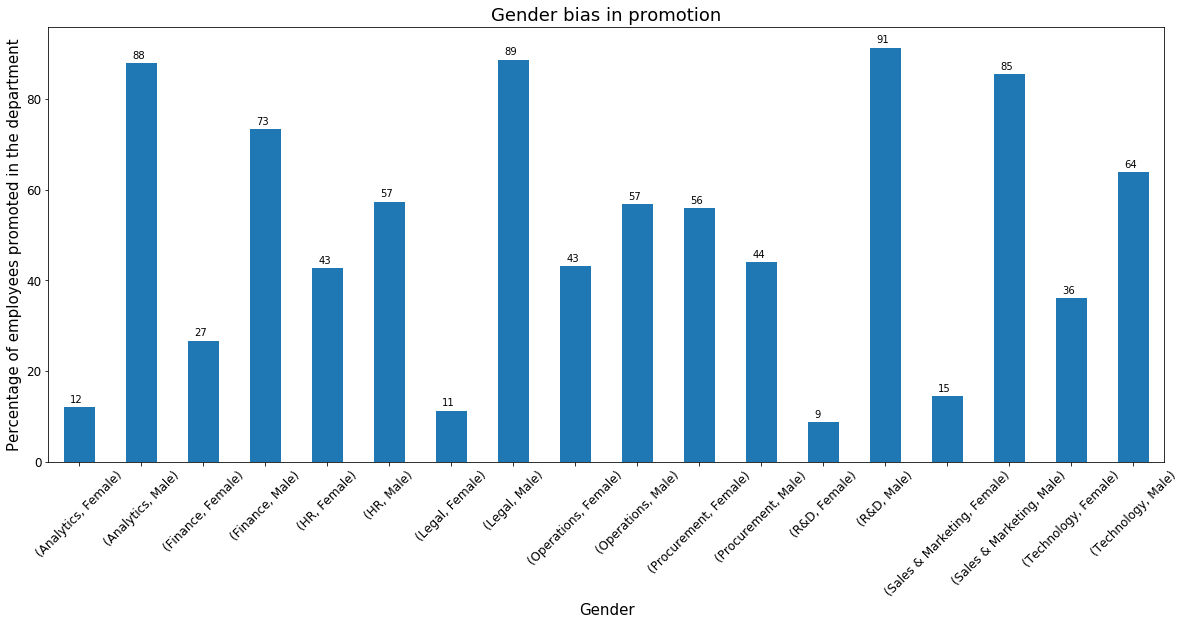

In [44]:
gender_bias = pd.DataFrame(promoted.groupby(['department','gender'])['is_promoted'].count())
gender_bias['percent'] = gender_bias['is_promoted']/(gender_bias.groupby(['department'])['is_promoted'].sum()) * 100
plt.figure(figsize = (20,8))
plot = gender_bias['percent'].plot.bar()
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Percentage of employees promoted in the department", fontsize = 15)
plt.title("Gender bias in promotion", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+ 1))

#### Here we can see why there are few female employees getting promoted because of the bad gender diversity displayed in the previous chart

In [45]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Age Group,joining age,Age Join Group
0,65438,Sales & Marketing,region_7,Master's & above,Female,sourcing,1,35,5.0,8,1,0,49,0,28 to 35,27,22 to 26
1,65141,Operations,region_22,Bachelor's,Male,other,1,30,5.0,4,0,0,60,0,28 to 35,26,22 to 26
2,7513,Sales & Marketing,region_19,Bachelor's,Male,sourcing,1,34,3.0,7,0,0,50,0,28 to 35,27,22 to 26
3,2542,Sales & Marketing,region_23,Bachelor's,Male,other,2,39,1.0,10,0,0,50,0,36 to 44,29,27 to 29
4,48945,Technology,region_26,Bachelor's,Male,other,1,45,3.0,2,0,0,73,0,36 to 44,43,40 to 59


#### Are internal  meeting the targets or external hires?

In [46]:
hiring = pd.DataFrame(train.groupby(['recruitment_channel','KPIs_met >80%'])['KPIs_met >80%'].count())
hiring['percent'] = (hiring['KPIs_met >80%']/hiring.groupby(['recruitment_channel'])['KPIs_met >80%'].sum()) * 100
hiring

KPIs_met >80%    percent
recruitment_channel KPIs_met >80%                          
other               0                      19815  65.082441
                    1                      10631  34.917559
referred            0                        562  49.211909
                    1                        580  50.788091
sourcing            0                      15140  65.202412
                    1                       8080  34.797588

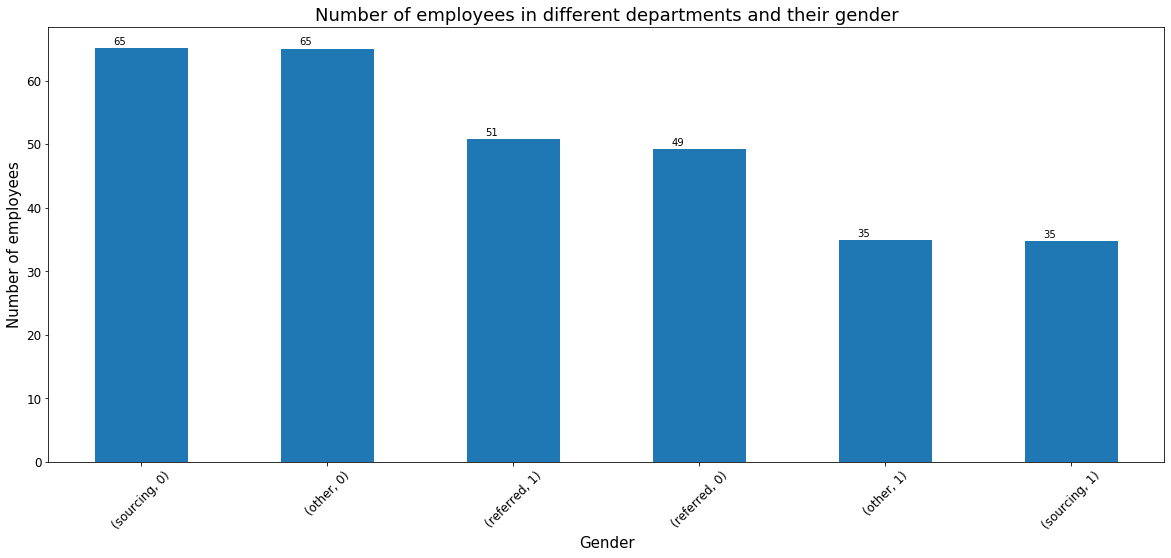

In [47]:
plt.figure(figsize = (20,8))
plot = hiring['percent'].sort_values(ascending = False).plot.bar()
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Number of employees", fontsize = 15)
plt.title("Number of employees in different departments and their gender", fontsize = 18)
plt.xticks(fontsize = 12,rotation = 45)
plt.yticks(fontsize = 12)
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+ 0.5))

#### 50% of referrals and 34% of each of sourcing and others are reaching their targets

#### Finding the correlation among the variables

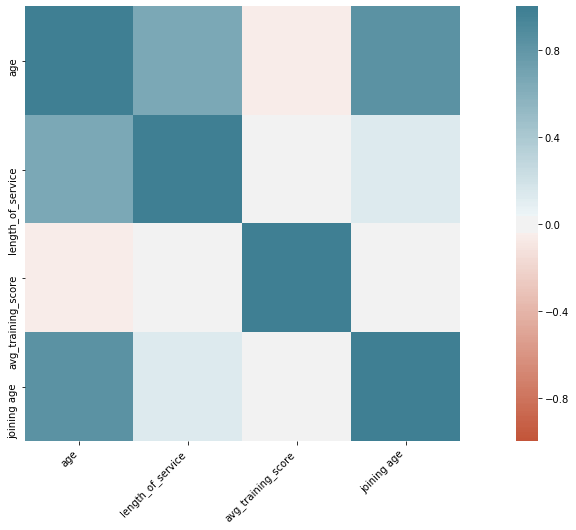

In [144]:
cont_var = train[['age', 'length_of_service','avg_training_score','joining age']]
corr = cont_var.corr()
ax = sb.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sb.diverging_palette(20, 220, n = 200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment ='right'
);

### Model Building

In [48]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Age Group,joining age,Age Join Group
0,65438,Sales & Marketing,region_7,Master's & above,Female,sourcing,1,35,5.0,8,1,0,49,0,28 to 35,27,22 to 26
1,65141,Operations,region_22,Bachelor's,Male,other,1,30,5.0,4,0,0,60,0,28 to 35,26,22 to 26
2,7513,Sales & Marketing,region_19,Bachelor's,Male,sourcing,1,34,3.0,7,0,0,50,0,28 to 35,27,22 to 26
3,2542,Sales & Marketing,region_23,Bachelor's,Male,other,2,39,1.0,10,0,0,50,0,36 to 44,29,27 to 29
4,48945,Technology,region_26,Bachelor's,Male,other,1,45,3.0,2,0,0,73,0,36 to 44,43,40 to 59


In [49]:
train['education'].value_counts()

Bachelor's          38659
Master's & above    15344
Below Secondary       805
Name: education, dtype: int64

In [50]:
train.loc[train['education'] == "Bachelor's", 'education'] = 1
train.loc[train['education'] == "Below Secondary", 'education'] = 2
train.loc[train['education'] == "Master's & above", 'education'] = 3

In [51]:
train['education'].value_counts()

1    38659
3    15344
2      805
Name: education, dtype: int64

In [52]:
train['total_score'] = train['no_of_trainings'] * train['avg_training_score']

In [53]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Age Group,joining age,Age Join Group,total_score
0,65438,Sales & Marketing,region_7,3,Female,sourcing,1,35,5.0,8,1,0,49,0,28 to 35,27,22 to 26,49
1,65141,Operations,region_22,1,Male,other,1,30,5.0,4,0,0,60,0,28 to 35,26,22 to 26,60
2,7513,Sales & Marketing,region_19,1,Male,sourcing,1,34,3.0,7,0,0,50,0,28 to 35,27,22 to 26,50
3,2542,Sales & Marketing,region_23,1,Male,other,2,39,1.0,10,0,0,50,0,36 to 44,29,27 to 29,100
4,48945,Technology,region_26,1,Male,other,1,45,3.0,2,0,0,73,0,36 to 44,43,40 to 59,73


In [54]:
train = train.drop(['employee_id','region'], axis = 1)

In [55]:
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Age Group,joining age,Age Join Group,total_score
0,Sales & Marketing,3,Female,sourcing,1,35,5.0,8,1,0,49,0,28 to 35,27,22 to 26,49
1,Operations,1,Male,other,1,30,5.0,4,0,0,60,0,28 to 35,26,22 to 26,60
2,Sales & Marketing,1,Male,sourcing,1,34,3.0,7,0,0,50,0,28 to 35,27,22 to 26,50
3,Sales & Marketing,1,Male,other,2,39,1.0,10,0,0,50,0,36 to 44,29,27 to 29,100
4,Technology,1,Male,other,1,45,3.0,2,0,0,73,0,36 to 44,43,40 to 59,73


#### Encoding the categorical variables

In [56]:
train = pd.get_dummies(train, columns = ['department','gender','recruitment_channel'], drop_first = True)

In [57]:
train.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Age Group,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_Male,recruitment_channel_referred,recruitment_channel_sourcing
0,3,1,35,5.0,8,1,0,49,0,28 to 35,...,0,0,0,0,0,1,0,0,0,1
1,1,1,30,5.0,4,0,0,60,0,28 to 35,...,0,0,1,0,0,0,0,1,0,0
2,1,1,34,3.0,7,0,0,50,0,28 to 35,...,0,0,0,0,0,1,0,1,0,1
3,1,2,39,1.0,10,0,0,50,0,36 to 44,...,0,0,0,0,0,1,0,1,0,0
4,1,1,45,3.0,2,0,0,73,0,36 to 44,...,0,0,0,0,0,0,1,1,0,0


In [58]:
pd.set_option('display.max_columns', 500)

In [59]:
X = train.iloc[:,[0,1,2,3,4,5,6,7,10,12,13,14,15,16,17,18,19,20,21,22,23]].values
y = train.iloc[:,8].values

In [60]:
features = ["education","no_of_trainings","age","previous_year_rating","length_of_service","KPIs_met >80%","awards_won?","avg_training_score","joining age","total_score","department_Finance","department_HR","department_Legal","department_Operations","department_Procurement","department_R&D","department_Sales & Marketing","department_Technology","gender_Male","recruitment_channel_referred","recruitment_channel_sourcing"]

In [61]:
y = train['is_promoted'].astype('int')

#### Scaling the continuous variables

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### Splitting into train and test sets

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##### Fitting Logistic Regression model

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

#### Predicting the test set

In [65]:
y_pred_lr = lr.predict(X_test)

#### Confusion matrix and Classification Report

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_lr)
cr = classification_report(y_test, y_pred_lr)
print(cm)
print(cr)

[[9926   40]
 [ 723  273]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9966
           1       0.87      0.27      0.42       996

    accuracy                           0.93     10962
   macro avg       0.90      0.64      0.69     10962
weighted avg       0.93      0.93      0.91     10962



##### Here we can see that the recall value is less. That means that out of the total number of people promoted we predicted 26% of those. So if we use this model deserving people wont be promoted. One reason for this is that the dataset contains very few instances (8.5%) where employees were promoted. So, we will use SMOTE to duplicate the number of instances were people were promoted

In [67]:
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

Before OverSampling, the shape of X_train: (43846, 21)
Before OverSampling, the shape of y_train: (43846,) 



In [68]:
print("In the training set the number of employees promoted before oversampling: {}".format(sum(y_train == 1)))
print("In the training set the number of employees not promoted before oversampling: {} \n".format(sum(y_train == 0)))

In the training set the number of employees promoted before oversampling: 3672
In the training set the number of employees not promoted before oversampling: 40174 



#### Using SMOTE to oversample the minority cases

In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train.ravel())

In [74]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_resampled.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_resampled.shape))

After OverSampling, the shape of X_train: (80348, 21)
After OverSampling, the shape of y_train: (80348,) 



#### Here we can see that the number of rows in the training set has increased from 43946 to 80190 by duplicating the cases for the number of people promoted

In [75]:
print("In the training set the number of employees promoted after oversampling: {}".format(sum(y_train_resampled == 1)))
print("In the training set the number of employees not promoted after oversampling:  {}".format(sum(y_train_resampled == 0)))

In the training set the number of employees promoted after oversampling: 40174
In the training set the number of employees not promoted after oversampling:  40174


#### Fitting the Logistic Regression model 

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_lr)
cr = classification_report(y_test, y_pred_lr)
print(cm)
print(cr)

[[7603 2363]
 [ 182  814]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      9966
           1       0.26      0.82      0.39       996

    accuracy                           0.77     10962
   macro avg       0.62      0.79      0.62     10962
weighted avg       0.91      0.77      0.81     10962



In [78]:
cm = cm/cm.sum(axis = 1).reshape(-1,1)
cm

array([[0.76289384, 0.23710616],
       [0.18273092, 0.81726908]])

In [79]:
def confusion_matrix_plot(cm, classes = None, title = 'confusion matrix'):
    if classes is not None:
        sb.heatmap(cm, xticklabels = classes, yticklabels = classes, vmin = 0, vmax = 1, annot = True)
    else:
        sb.heatmap(cm, vmin = 0, vmax = 1)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix")

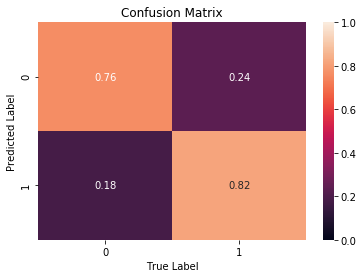

In [80]:
confusion_matrix_plot(cm, classes = lr.classes_, title = 'confusion_matrix')

#### Here we can see that the number of correct positive prediction have increased from 234 to 731. The recall value has increased from 0.26 to 0.8 which means our model is now predicting correctly the employees who should be promoted. But the accuracy of the model needs to be improved.

In [81]:
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i in thresholds:
    print("For threshold value of : {}".format(i))
    y_pred_lr_opt = (lr.predict_proba(X_test)[:,1] >= i).astype(int)
    print("The classification report for the threshold {} is as follows: \n {}".format(i, classification_report(y_test, y_pred_lr_opt)))

For threshold value of : 0.5
The classification report for the threshold 0.5 is as follows: 
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      9966
           1       0.26      0.82      0.39       996

    accuracy                           0.77     10962
   macro avg       0.62      0.79      0.62     10962
weighted avg       0.91      0.77      0.81     10962

For threshold value of : 0.55
The classification report for the threshold 0.55 is as follows: 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      9966
           1       0.27      0.78      0.40       996

    accuracy                           0.79     10962
   macro avg       0.62      0.78      0.64     10962
weighted avg       0.91      0.79      0.83     10962

For threshold value of : 0.6
The classification report for the threshold 0.6 is as follows: 
               precision    recall  f1-score   support

       

#### Here we can see how with increasing the threshold the accuracy is increasing, but it in that process we are misclassifing employees who didnt get a promotion as employees who got promotion. So we have to look at the recall value as well as accuracy and find the optimal threshold value which is at the default value of 0.5

#### Applying Support Vector Machine to the dataset

In [82]:
from sklearn.svm import SVC

In [83]:
svm = SVC()
svm.fit(X_train_resampled, y_train_resampled)

SVC()

#### Predicting with test dataset

In [84]:
y_pred_svm = svm.predict(X_test)

#### Getting the accuracy of the predction

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_svm)
cr = classification_report(y_test, y_pred_svm)
print(cm)
print(cr)

[[7252 2714]
 [ 128  868]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      9966
           1       0.24      0.87      0.38       996

    accuracy                           0.74     10962
   macro avg       0.61      0.80      0.61     10962
weighted avg       0.92      0.74      0.79     10962



In [86]:
cm = cm/cm.sum(axis = 1).reshape(-1,1)
cm

array([[0.72767409, 0.27232591],
       [0.12851406, 0.87148594]])

#### Plotting the confusion matrix

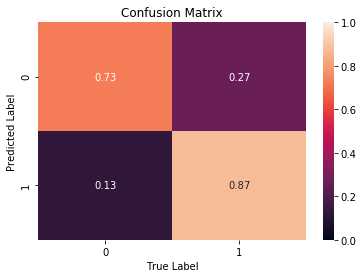

In [87]:
confusion_matrix_plot(cm, classes = svm.classes_, title = 'confusion_matrix')

#### This model is a better one at predicting the minority labels

#### Applying K Nearest Neighbors to the dataset

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=4)

#### Predicting with the test dataset

In [90]:
y_pred_knn = knn.predict(X_test)

#### Getting the accuracy of the prediction

In [91]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_knn)
cr = classification_report(y_test, y_pred_knn)
cm = cm/cm.sum(axis = 1).reshape(-1,1)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      9966
           1       0.31      0.51      0.38       996

    accuracy                           0.85     10962
   macro avg       0.63      0.70      0.65     10962
weighted avg       0.89      0.85      0.87     10962

[[0.88460767 0.11539233]
 [0.48895582 0.51104418]]


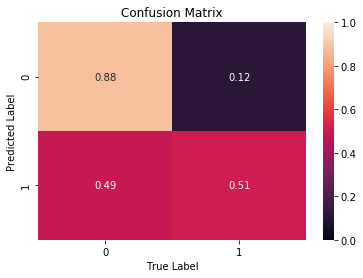

In [92]:
confusion_matrix_plot(cm, classes = svm.classes_, title = 'confusion_matrix')

#### The model is not doing a good job in predicting the promoted employees

#### Applying Random Forest to the dataset

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

#### Predicting the results of the test set

In [94]:
y_pred_rf = rf.predict(X_test)

#### Getting the accuracies of the prediction

In [96]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_rf)
cr = classification_report(y_test, y_pred_rf)
cm = cm/cm.sum(axis = 1).reshape(-1,1)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9966
           1       0.64      0.41      0.50       996

    accuracy                           0.93     10962
   macro avg       0.79      0.69      0.73     10962
weighted avg       0.92      0.93      0.92     10962

[[0.97692153 0.02307847]
 [0.59036145 0.40963855]]


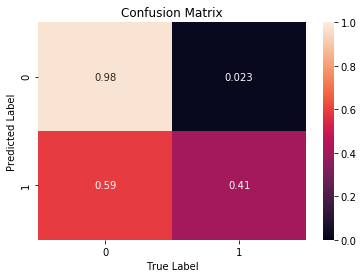

In [97]:
confusion_matrix_plot(cm, classes = svm.classes_, title = 'confusion_matrix')

#### This model is also not doing good in predicting the promoted employees

#### Building an artificial neural network

#### Initializing the RNN

In [105]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

#### Adding the layers to the neural network

In [106]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Compiling and Training the ANN

In [107]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(X_train_resampled, y_train_resampled, batch_size = 32, epochs = 100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
80348/80348 [==============================] - 24s 303us/sample - loss: 0.4658 - acc: 0.7655
Epoch 2/100
80348/80348 [==============================] - 19s 232us/sample - loss: 0.3477 - acc: 0.8237
Epoch 3/100
80348/80348 [==============================] - ETA: 0s - loss: 0.3425 - acc: 0.826 - 22s 275us/sample - loss: 0.3425 - acc: 0.8265
Epoch 4/100
80348/80348 [==============================] - 22s 275us/sample - loss: 0.3399 - acc: 0.8276
Epoch 5/100
80348/80348 [==============================] - 21s 265us/sample - loss: 0.3376 - acc: 0.8290
Epoch 6/100
80348/80348 [==============================] - 20s 246us/sample - loss: 0.3359 - acc: 0.8293
Epoch 7/100
80348/80348 [==============================] - 21s 258us/sample - loss: 0.3350 - acc: 0.8293 - loss: 0. - ETA: 0s - loss: 0.3354 - acc: 0.82 - ETA: 0s - loss: 0.
Epoch 8/100
80348/80348 [=============

#### Predicting the Test set results

In [111]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

#### Getting the confusion matrix

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)
cm = cm/cm.sum(axis = 1).reshape(-1,1)
cm

[[7028 2938]
 [  72  924]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.82      9966
           1       0.24      0.93      0.38       996

    accuracy                           0.73     10962
   macro avg       0.61      0.82      0.60     10962
weighted avg       0.92      0.73      0.78     10962



array([[0.70519767, 0.29480233],
       [0.07228916, 0.92771084]])

#### Here we can see that the recall value is the highest among all the models

#### Comparing the performance of the models

In [134]:
models = [['Logistic Regression', 76, 82, 77], ['Support Vector Machine', 72, 87, 74], ['K Nearest Neighbors', 88, 51, 85], 
        ['Random Foreset', 97, 40, 93], ['Artificial Neural Network', 70, 92, 73]] 

accuracies = pd.DataFrame(models, columns = ['Model', '% of correct Not Promoted Predictions', '% of correct Promoted Predictions',
                                            'Accuracy of the model']) 
  
accuracies

,Model,% of correct Not Promoted Predictions,% of correct Promoted Predictions,Accuracy of the model
0,Logistic Regression,76,82,77
1,Support Vector Machine,72,87,74
2,K Nearest Neighbors,88,51,85
3,Random Foreset,97,40,93
4,Artificial Neural Network,70,92,73


#### K Nearest Neighbor and Random Forest cannot be chosen because their coorect promoted predictions are very low, though their accuracies are high. Out of logistic regression, support vector machine and artificial neural network I would choose the Artificial Neural Network because it is predicting the promoted employees correctly.